## Imports

In [2]:
import evalseg

import numpy as np
import pandas as pd
from ipywidgets import interact,interact_manual, IntSlider
import os

## Variables

In [3]:
root_data='../datasets'

## Run Metric

In [26]:
evalseg.reload()
@interact
def select_dataset(dataset_name=sorted([d for d in os.listdir(root_data) if os.path.isdir(f'{root_data}/{d}')])):
    global dataset

    dataset=evalseg.io.NibDataset(f'{root_data}/{dataset_name}')
    
    @interact_manual
    def select_case(case=sorted(dataset.get_available_ids())):
        gto,gto_voxelsize=dataset.get_groundtruth(case)
        cto,cto_voxelsize=dataset.get_CT(case)
        @interact
        def ax_select(ax=['z', 'x', 'y', 'all']):
            gtmax = (gto.sum(axis=2).sum(axis=1).argmax(), gto.sum(axis=2).sum(axis=0).argmax(), gto.sum(axis=1).sum(axis=0).argmax())
            axi = {'all': -1, 'x': 0, 'y': 1, 'z': 2}[ax]
            @interact
            def onlyMaxFrame(frame=IntSlider(-1,min=-1,max=-1) if ax=='all' else IntSlider(gtmax[axi], min=0, max=gto.shape[axi]-1)):
                global data, gt, voxelsize
                
                gt, voxelsize = evalseg.geometry.slice(gto, gto_voxelsize, axi, [frame])
                ct, _ = evalseg.geometry.slice(cto, None, axi, [frame])            
                mme = evalseg.metrics.MultiClassMetric(
                    evalseg.metrics.MME,
                    dataset.num_labels,
                    debug={'U':1,'B':1,'D':1,'UI':1}
                    )
                mme.set_reference(gt, voxelsize)

                @interact
                def pred_selec(prediction=dataset.get_prediction_methods()):
                    global pred
                    pred,_= dataset.get_prediction(prediction,case)
                    pred,_=evalseg.geometry.slice(pred, None, axi, [frame])
                    if ax!='all':
                        imglbl = f"{dataset_name.split('_')[1]} {case} {ax}={frame}"
                        comps=mme.metrics[1].helper['components']
                        gt2=gt.copy()
                        for c in comps:
                            gt2 = gt2& ~ comps[c]['gt_skeleton']
                        evalseg.ui.multi_plot_2d(ct, gt2, {prediction:pred}, spacing=voxelsize, args={"imglabel": imglbl, 'z_titles': [frame],'crop2roi':0})
                    else:
                        pass #TODO

                    res=mme.evaluate(pred,parallel=0)
                    evalseg.ui.plot_metric(res, name=dataset_name)

interactive(children=(Dropdown(description='dataset_name', options=('Task001_LiverTumor', 'Task002_Pancreas', …

'======= setting reference class=1 ======'

  0%|          | 0/1 [00:00<?, ?it/s]

======= evaluate class=1 p=p ======


C:\Users\Ali\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:48: RuntimeWarning:

overflow encountered in reduce



  0%|          | 0/4 [00:00<?, ?it/s]

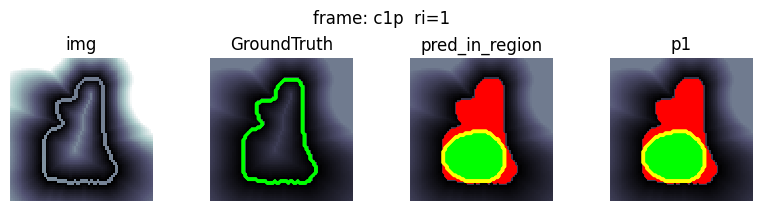

  U tp+1.0  fn+0.0           Z[r+][1][p+]==1.0


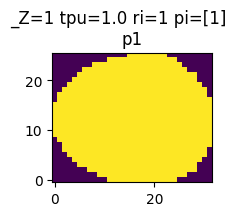

     B tp+0.63 fn+0.37 fp+0.0  ri=1  


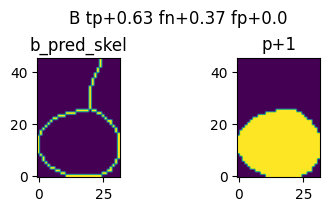

 D TP+1.0  FN+0.0 FP+0.0     ri=1, p+=[1]


  0%|          | 0/4 [00:00<?, ?it/s]

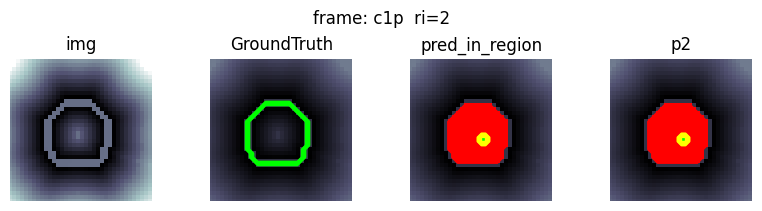

  U tp+1.0  fn+0.0           Z[r+][2][p+]==1.0


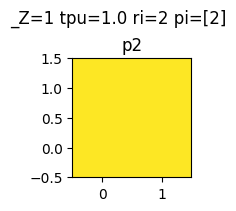

     B tp+0.16 fn+0.84 fp+0.0  ri=2  


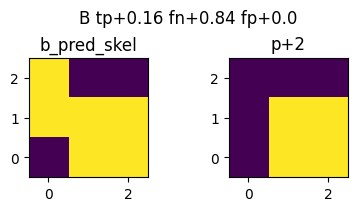

 D TP+1.0  FN+0.0 FP+0.0     ri=2, p+=[2]


  0%|          | 0/4 [00:00<?, ?it/s]

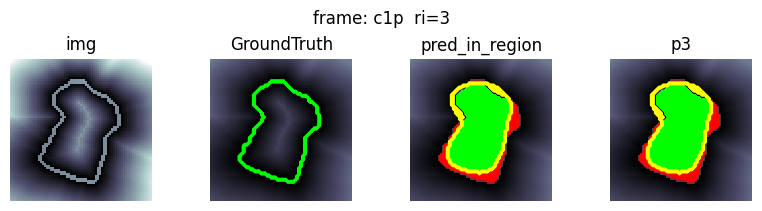

  U tp+1.0  fn+0.0           Z[r+][3][p+]==1.0


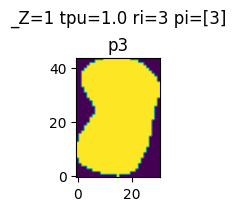

     B tp+0.89 fn+0.11 fp+0.01  ri=3  


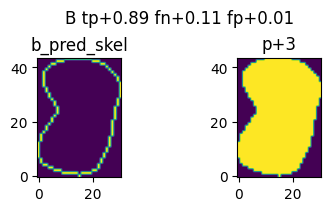

 D TP+1.0  FN+0.0 FP+0.0     ri=3, p+=[3]


  0%|          | 0/4 [00:00<?, ?it/s]

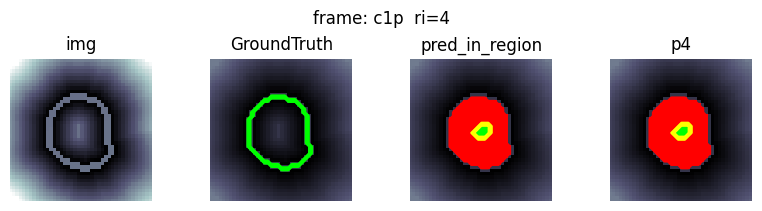

  U tp+1.0  fn+0.0           Z[r+][4][p+]==1.0


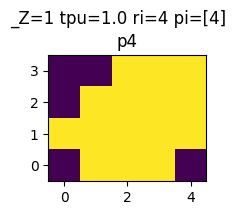

     B tp+0.18 fn+0.82 fp+0.0  ri=4  


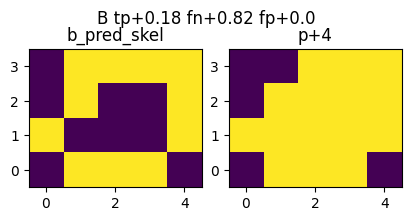

 D TP+1.0  FN+0.0 FP+0.0     ri=4, p+=[4]


  0%|          | 0/4 [00:00<?, ?it/s]

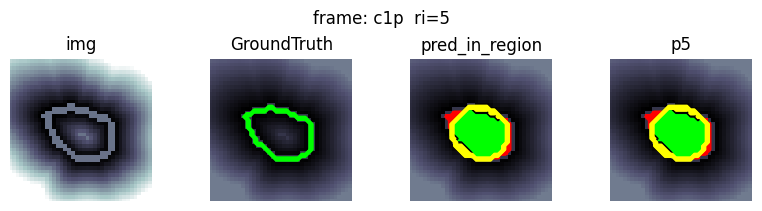

  U tp+1.0  fn+0.0           Z[r+][5][p+]==1.0


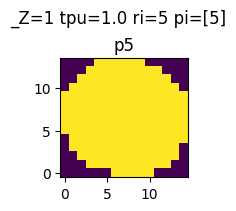

     B tp+0.94 fn+0.06 fp+0.01  ri=5  


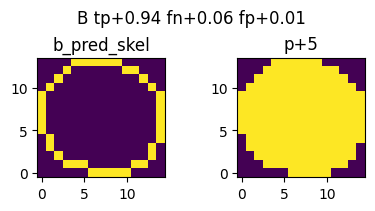

 D TP+1.0  FN+0.0 FP+0.0     ri=5, p+=[5]


  0%|          | 0/4 [00:00<?, ?it/s]

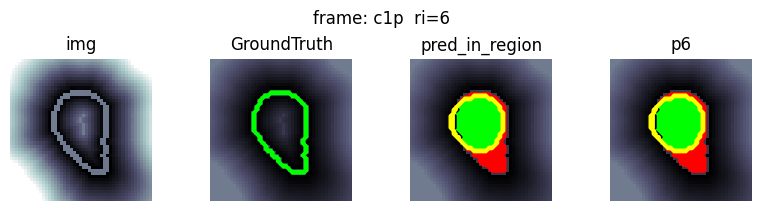

  U tp+1.0  fn+0.0           Z[r+][6][p+]==1.0


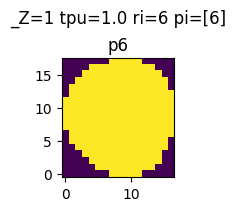

     B tp+0.86 fn+0.14 fp+0.0  ri=6  


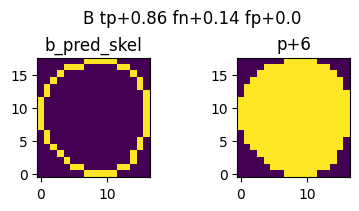

 D TP+1.0  FN+0.0 FP+0.0     ri=6, p+=[6]


  0%|          | 0/4 [00:00<?, ?it/s]

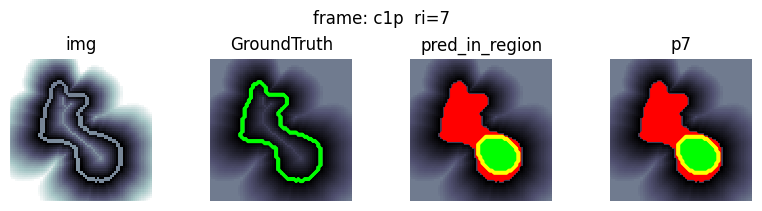

  U tp+1.0  fn+0.0           Z[r+][7][p+]==1.0


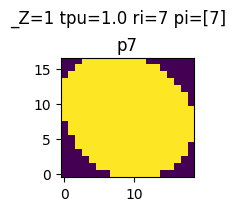

     B tp+0.49 fn+0.51 fp+0.0  ri=7  


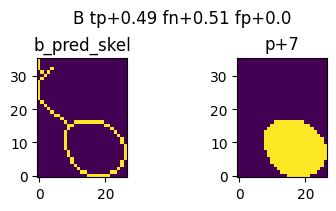

 D TP+1.0  FN+0.0 FP+0.0     ri=7, p+=[7]


  0%|          | 0/5 [00:00<?, ?it/s]

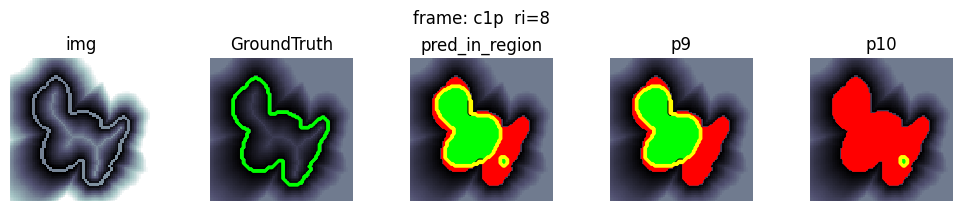

  U tp+0.5  fn+0.5           Z[r+][8][p+]==2.0


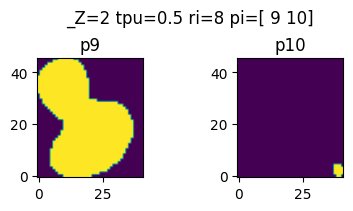

     B tp+0.61 fn+0.39 fp+0.0  ri=8  


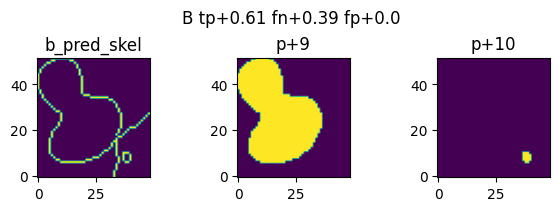

 D TP+1.0  FN+0.0 FP+0.0     ri=8, p+=[ 9 10]


  0%|          | 0/4 [00:00<?, ?it/s]

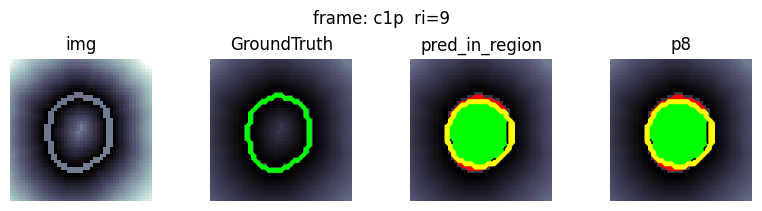

  U tp+1.0  fn+0.0           Z[r+][9][p+]==1.0


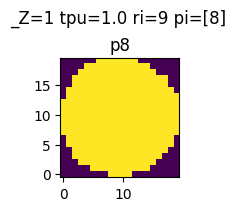

     B tp+0.94 fn+0.06 fp+0.0  ri=9  


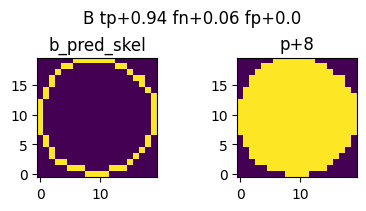

 D TP+1.0  FN+0.0 FP+0.0     ri=9, p+=[8]


  0%|          | 0/4 [00:00<?, ?it/s]

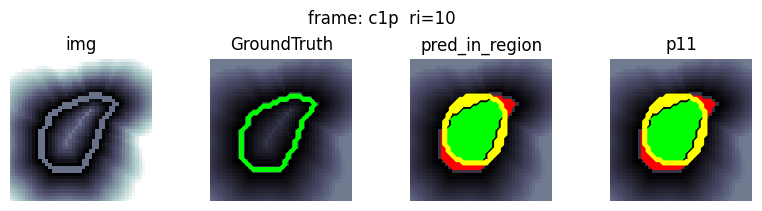

  U tp+1.0  fn+0.0           Z[r+][10][p+]==1.0


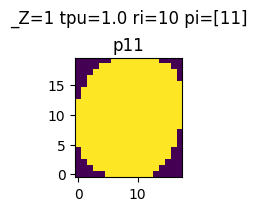

     B tp+0.9 fn+0.1 fp+0.05  ri=10  


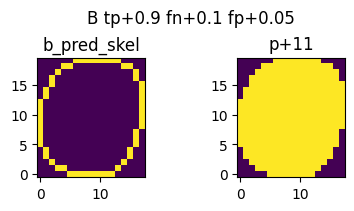

 D TP+1.0  FN+0.0 FP+0.0     ri=10, p+=[11]


  0%|          | 0/4 [00:00<?, ?it/s]

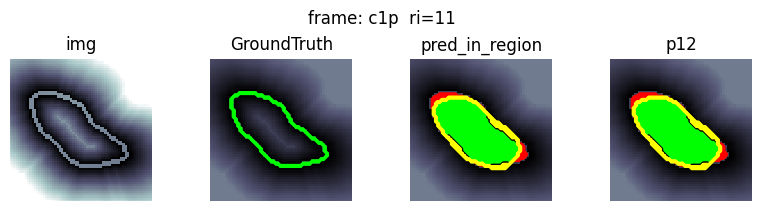

  U tp+1.0  fn+0.0           Z[r+][11][p+]==1.0


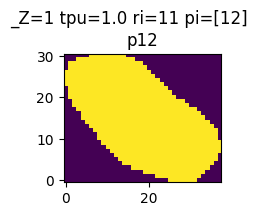

     B tp+0.95 fn+0.05 fp+0.02  ri=11  


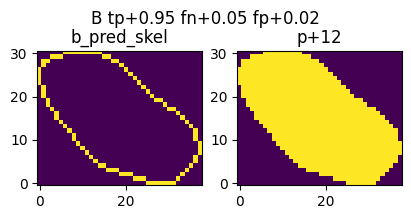

 D TP+1.0  FN+0.0 FP+0.0     ri=11, p+=[12]


  0%|          | 0/7 [00:00<?, ?it/s]

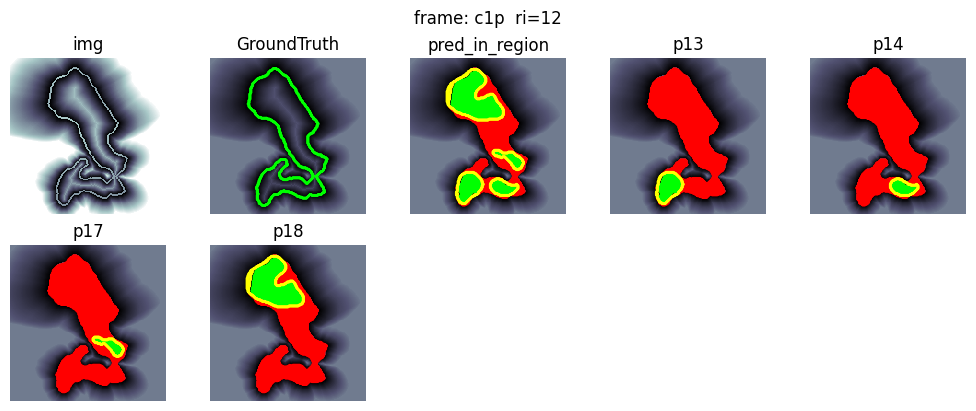

  U tp+0.25  fn+0.75           Z[r+][12][p+]==4.0


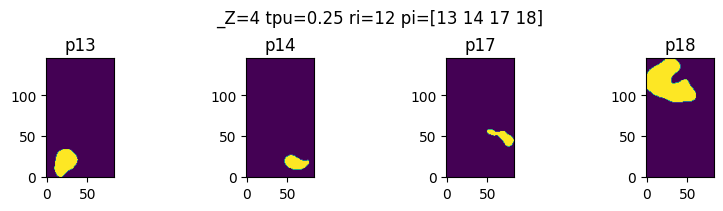

     B tp+0.57 fn+0.43 fp+0.0  ri=12  


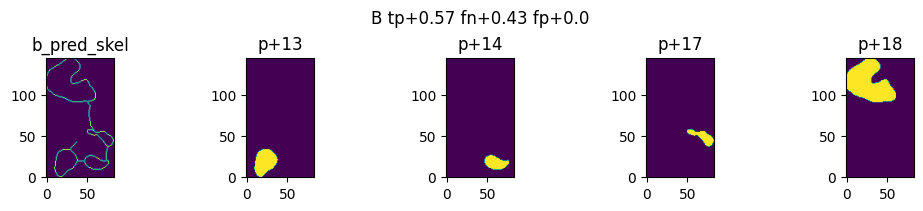

 D TP+1.0  FN+0.0 FP+0.0     ri=12, p+=[13 14 17 18]


  0%|          | 0/4 [00:00<?, ?it/s]

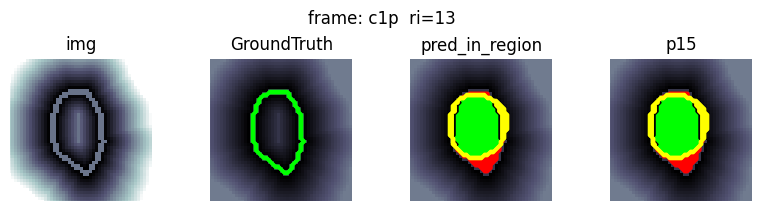

  U tp+1.0  fn+0.0           Z[r+][13][p+]==1.0


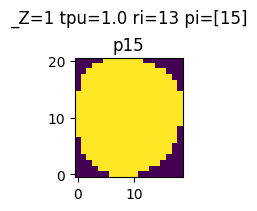

     B tp+0.92 fn+0.08 fp+0.02  ri=13  


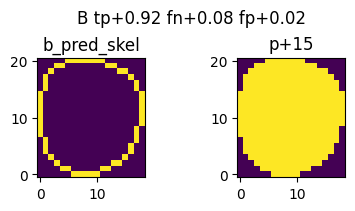

 D TP+1.0  FN+0.0 FP+0.0     ri=13, p+=[15]


  0%|          | 0/4 [00:00<?, ?it/s]

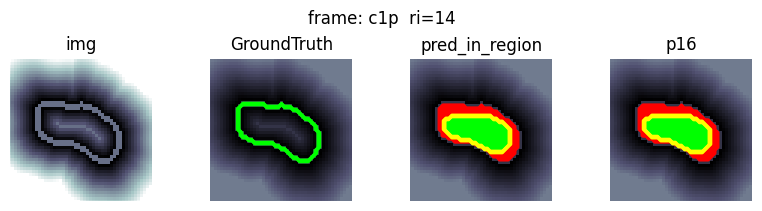

  U tp+1.0  fn+0.0           Z[r+][14][p+]==1.0


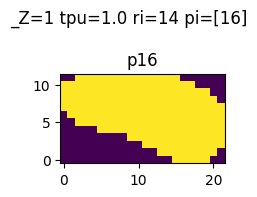

     B tp+0.64 fn+0.36 fp+0.0  ri=14  


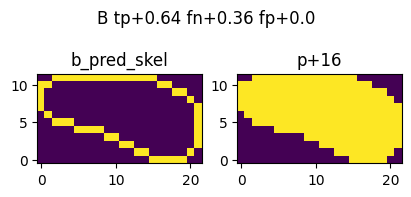

 D TP+1.0  FN+0.0 FP+0.0     ri=14, p+=[16]


  0%|          | 0/3 [00:00<?, ?it/s]

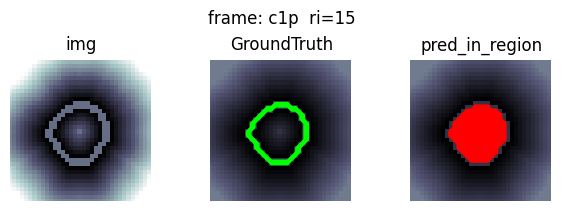

 D TP+0.0  FN+1.0 FP+0.0     ri=15, p+=[]


  0%|          | 0/3 [00:00<?, ?it/s]

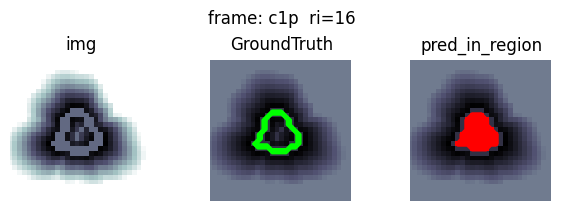

 D TP+0.0  FN+1.0 FP+0.0     ri=16, p+=[]


  0%|          | 0/4 [00:00<?, ?it/s]

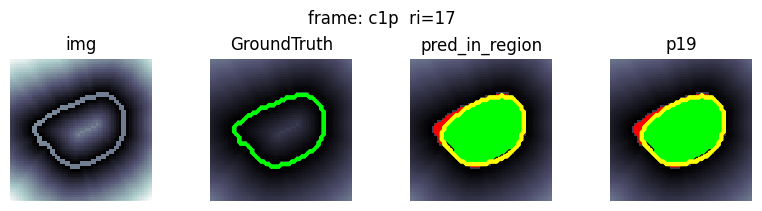

  U tp+1.0  fn+0.0           Z[r+][17][p+]==1.0


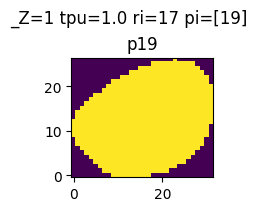

     B tp+0.97 fn+0.03 fp+0.0  ri=17  


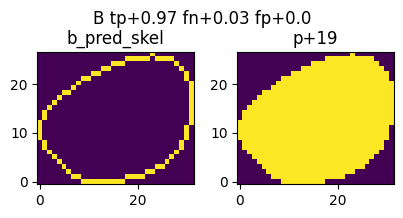

 D TP+1.0  FN+0.0 FP+0.0     ri=17, p+=[19]
 D FP+0.0      pi=1, r=[1]==0
  U fp+0.0             Z[p+][1][r+]==1.0
 D FP+0.0      pi=2, r=[2]==0
  U fp+0.0             Z[p+][2][r+]==1.0
 D FP+0.0      pi=3, r=[3]==0
  U fp+0.0             Z[p+][3][r+]==1.0
 D FP+0.0      pi=4, r=[4]==0
  U fp+0.0             Z[p+][4][r+]==1.0
 D FP+0.0      pi=5, r=[5]==0
  U fp+0.0             Z[p+][5][r+]==1.0
 D FP+0.0      pi=6, r=[6]==0
  U fp+0.0             Z[p+][6][r+]==1.0
 D FP+0.0      pi=7, r=[7]==0
  U fp+0.0             Z[p+][7][r+]==1.0
 D FP+0.0      pi=8, r=[9]==0
  U fp+0.0             Z[p+][8][r+]==1.0
 D FP+0.0      pi=9, r=[8]==0
  U fp+0.0             Z[p+][9][r+]==1.0
 D FP+0.0      pi=10, r=[8]==0
  U fp+0.0             Z[p+][10][r+]==1.0
 D FP+0.0      pi=11, r=[10]==0
  U fp+0.0             Z[p+][11][r+]==1.0
 D FP+0.0      pi=12, r=[11]==0
  U fp+0.0             Z[p+][12][r+]==1.0
 D FP+0.0      pi=13, r=[12]==0
  U fp+0.0             Z[p+][13][r+]==1.0
 D FP+0.0      pi=14, 

tp      fp       fn   prc   tpr    f1
Class 1                                              
None    D    15.00    0.00     2.00  1.00  0.88  0.94
        B    10.67    0.11     4.33  0.99  0.71  0.83
        U    13.75    0.00     1.25  1.00  0.92  0.96
        R     9.29    0.50     5.71  0.95  0.62  0.75
        T  3837.00  130.52  2622.34  0.97  0.59  0.74

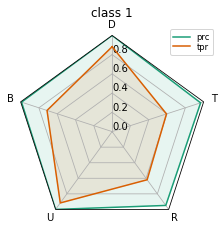

In [48]:
evalseg.reload()
mme = evalseg.metrics.MultiClassMetric(
                    evalseg.metrics.MME,
                    dataset.num_labels,
                    debug={'U':1,'B':1,'D':1,'UI':1}
                    )
mme.set_reference(gt, voxelsize)

res=mme.evaluate(pred,parallel=0)
evalseg.ui.plot_metric(res)